In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# IV. Random Forest

# Task 4.1 and 4.2



1. How can the MTL strategy of loss combination in question 5 (part III) be used with a Random Forest? Explain.
**Explanation:** The steps to implement this approach are as follows:
1. Define the tasks and the corresponding loss functions
2. Define the weights for each task
3. Define the weighted loss function
4. Use the defined weighted loss function to train the Random Forest model. During the training process, the model will learn to optimize the weighted loss function by adjusting its parameters to minimize the overall error across all tasks. 

In summary, we can use two random forest models (built on T1 and T2) and can define the weighted loss function as a linear combination of the task-specific loss functions, weighted by their respective weights to minimize overall loss.

2. Use the augmented dataset obtained in question 3 (part III) to train a Random Forest for prediction of label1. Evaluate the model on and report the performance for both the tasks. Print confusion matrices for both.

In [ ]:
# Install Packages

!pip install texthero
!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 39.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 KB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.9 MB/s eta 0:00:00
  Created wheel for gensim: filename=gensim-3.8.3-cp39-cp39-linux_x86_64.whl size=26528077 sha256=ff7e953585348305bf815427228e3b37e9b70474f218b9d301f79fb20fc058c2
  Stored in directory: /root/.cache/pip/wheels/ca/5d/af/618594ec2f28608c1d6ee7d2b7e95a3e9b06551e3b80a491d6
Successfully built gensim
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.1
    Uninstalling wasabi-1.1.1:
      Successfully uninstalled wasabi-1.1.1
  Attemptin

In [ ]:
#Load Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import texthero as hero

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Loading d1_augment data sets created in Task III (3)

In [ ]:
d1_augment = pd.read_csv("/content/drive/My Drive/5151 Project/d1_augment.csv")
d1_augment_train_gen = pd.read_csv("/content/drive/My Drive/5151 Project/d1_train_augment.csv")
print(d1_augment.shape)

(7613, 4)


In [ ]:
d1_augment_df = d1_augment.copy()

## Data Pre-processing

- Using 'texthero' package for data pre-processing and data visualization for the given task as It integrates seamlessly with Pandas, making it easy to preprocess and analyze text data within a Pandas DataFrame. Additionaly, Texthero provides a variety of visualization tools to help you explore and understand text data, including word clouds, frequency plots, and scattertext plots.

In [ ]:
#create custom pipeline for cleaning text
custom_pipeline = [hero.preprocessing.fillna,
                   hero.preprocessing.lowercase,
                   hero.preprocessing.remove_whitespace,
                   hero.preprocessing.remove_urls,
                   hero.preprocessing.remove_diacritics,
                   hero.preprocessing.remove_digits,
                   hero.preprocessing.remove_punctuation,
                   hero.preprocessing.remove_stopwords,
                   hero.preprocessing.remove_round_brackets,
                   hero.preprocessing.remove_html_tags,
                   hero.preprocessing.remove_curly_brackets,
                   hero.preprocessing.remove_brackets,
                   ]


d1_augment['Clean_Text'] = d1_augment['text'].pipe(hero.clean, custom_pipeline)

In [ ]:
d1_augment[['text', 'Clean_Text']].head()

,text,Clean_Text
0,Ancient Mayan Tablet found via http://t.co/LmU...,ancient mayan tablet found via
1,Incredulous at continued outcry of welfare bei...,incredulous continued outcry welfare waste...
2,Hi yall this poem is called is the one about t...,hi yall poem called one snowstorm meet...
3,The Police Chief assured the crowd that this o...,police chief assured crowd officer related...
4,Learning from the Legacy of a Catastrophic Eru...,learning legacy catastrophic eruption n...


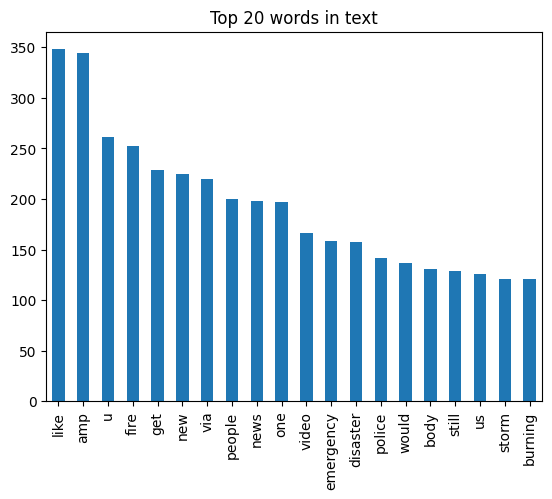

In [ ]:
# Data Visualization

NUM_TOP_WORDS = 20
top_20 = hero.visualization.top_words(d1_augment.loc[:, 'Clean_Text']).head(NUM_TOP_WORDS)
top_20.plot.bar(rot=90, title="Top 20 words in text");
plt.show(block=True);

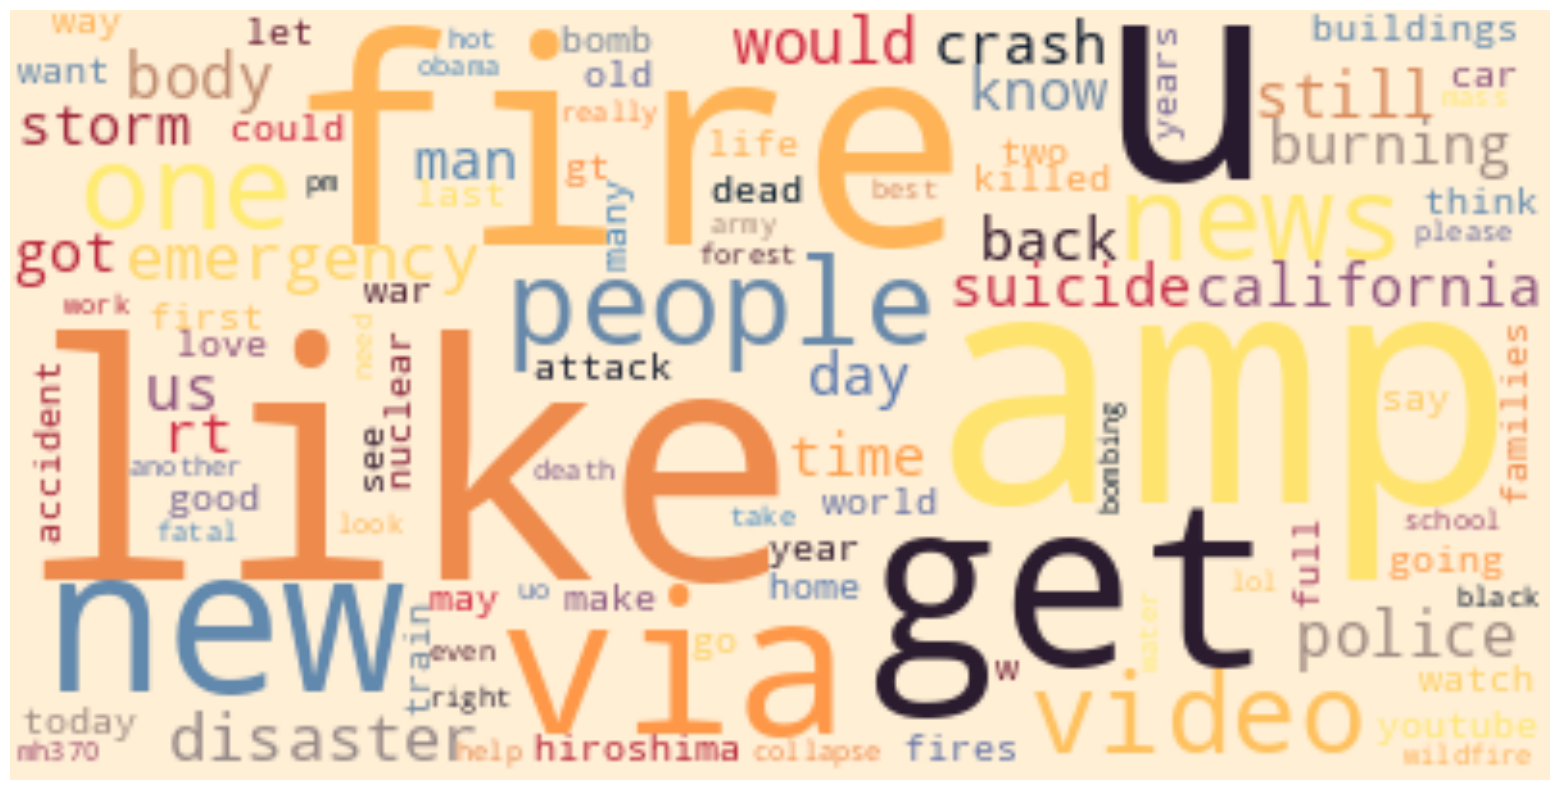

In [ ]:
#Plot wordcloud image using WordCloud method
hero.wordcloud(d1_augment.loc[:, 'Clean_Text'], max_words=100)

In [ ]:
d1_augment[['text', 'Clean_Text']].head()

,text,Clean_Text
0,Ancient Mayan Tablet found via http://t.co/LmU...,ancient mayan tablet found via
1,Incredulous at continued outcry of welfare bei...,incredulous continued outcry welfare waste...
2,Hi yall this poem is called is the one about t...,hi yall poem called one snowstorm meet...
3,The Police Chief assured the crowd that this o...,police chief assured crowd officer related...
4,Learning from the Legacy of a Catastrophic Eru...,learning legacy catastrophic eruption n...


In [ ]:
d1_augment.to_csv("/content/drive/My Drive/5151 Project/D1_augment_preprocessed.csv", index = False)

## Train - Validation data splitting

In [ ]:
from sklearn.model_selection import train_test_split

d1_augment_train, d1_augment_val, d1_augment_train_labels, d1_augment_val_labels = train_test_split(d1_augment.Clean_Text, d1_augment.target, test_size = 0.2, random_state = 123)


## Random Forest Model Building and Evaluation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

## Random Forest Model (Without weighted sample)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_d1_train_augment = vectorizer.fit_transform(d1_augment_train)
X_d1_val_augment = vectorizer.transform(d1_augment_val)

In [ ]:
model = RandomForestClassifier(n_estimators=300)
model.fit(X_d1_train_augment,d1_augment_train_labels)

In [ ]:
# Model prediction on D1_hat_Val (d1_augment_val) data
predictions_d1_rf = model.predict(X_d1_val_augment)

In [ ]:
# Model Evaluation on D1_hat_val data
print(accuracy_score(d1_augment_val_labels , predictions_d1_rf))
print(confusion_matrix(d1_augment_val_labels , predictions_d1_rf))
print(classification_report(d1_augment_val_labels , predictions_d1_rf))

accuracy = accuracy_score(d1_augment_val_labels , predictions_d1_rf)
precision = precision_score(d1_augment_val_labels , predictions_d1_rf)
recall = recall_score(d1_augment_val_labels , predictions_d1_rf)
f1 = f1_score(d1_augment_val_labels , predictions_d1_rf)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

0.8076165462902167
[[806  77]
 [216 424]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       883
           1       0.85      0.66      0.74       640

    accuracy                           0.81      1523
   macro avg       0.82      0.79      0.79      1523
weighted avg       0.81      0.81      0.80      1523

Accuracy: 0.81
Precision: 0.85
Recall: 0.66
F1 Score: 0.74


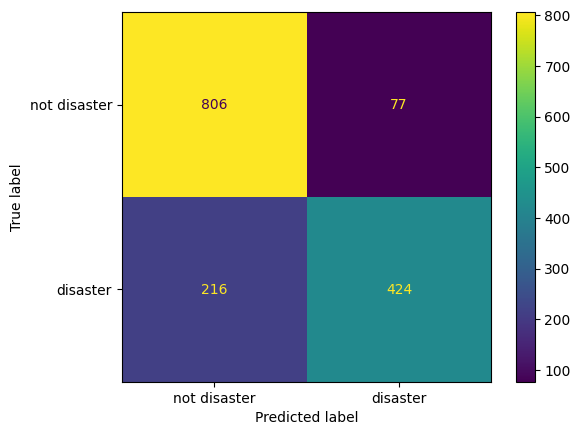

In [ ]:
# Confusion matrices on D1_hat_val data
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(d1_augment_val_labels , predictions_d1_rf), display_labels=['not disaster', 'disaster'])
disp.plot()
plt.show()

## Random Forest Model (With fixed unequal sample weights)

In [ ]:
# Define lambda values for sentiment classes
lambda_0 = 0.5   # lambda for sentiment=0
lambda_n = 0.75  # lambda for sentiment=1
lambda_p = 1.0   # lambda for sentiment=2

# Compute sample weights based on sentiment column
sentiment_weights = np.zeros_like(d1_augment_train_gen['target'], dtype=np.float32)
sentiment_weights[d1_augment_train_gen['sentiment'] == 0] = lambda_0
sentiment_weights[d1_augment_train_gen['sentiment'] == 1] = lambda_n
sentiment_weights[d1_augment_train_gen['sentiment'] == 2] = lambda_p

In [ ]:
rf_model = RandomForestClassifier()

rf_model.fit(X_d1_train_augment,d1_augment_train_labels, sample_weight=sentiment_weights)

RandomForestClassifier()

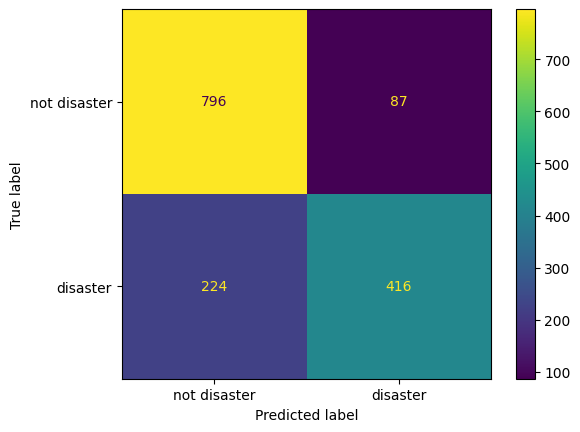

Accuracy: 0.80
Precision: 0.83
Recall: 0.65
F1 Score: 0.73


In [ ]:
# Model Prediction and Evaluation on D1_hat_val data
rf_model_pred = rf_model.predict(X_d1_val_augment)

accuracy = accuracy_score(d1_augment_val_labels, rf_model_pred)
precision = precision_score(d1_augment_val_labels, rf_model_pred)
recall = recall_score(d1_augment_val_labels, rf_model_pred)
f1 = f1_score(d1_augment_val_labels, rf_model_pred)

# Confusion Matrices
disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(d1_augment_val_labels , rf_model_pred), display_labels=['not disaster', 'disaster'])
disp1.plot()
plt.show()

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


## Random Forest (With fixed equal sample weights)

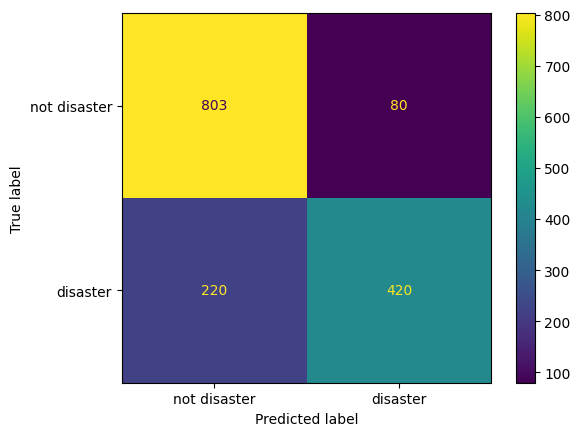

Accuracy: 0.80
Precision: 0.84
Recall: 0.66
F1 Score: 0.74


In [ ]:
# Define lambda values for sentiment classes
lambda_0 = 1.0   # lambda for sentiment=0
lambda_n = 1.0  # lambda for sentiment=1
lambda_p = 1.0   # lambda for sentiment=2

# Compute sample weights based on sentiment column
sentiment_weights = np.zeros_like(d1_augment_train_gen['target'], dtype=np.float32)
sentiment_weights[d1_augment_train_gen['sentiment'] == 0] = lambda_0
sentiment_weights[d1_augment_train_gen['sentiment'] == 1] = lambda_n
sentiment_weights[d1_augment_train_gen['sentiment'] == 2] = lambda_p

from sklearn.ensemble import RandomForestClassifier
rf_model2 = RandomForestClassifier()

rf_model2.fit(X_d1_train_augment,d1_augment_train_labels, sample_weight=sentiment_weights)

# Model Prediction and Evaluation on D1_hat_val data
rf_model_pred2 = rf_model2.predict(X_d1_val_augment)

accuracy = accuracy_score(d1_augment_val_labels, rf_model_pred2)
precision = precision_score(d1_augment_val_labels, rf_model_pred2)
recall = recall_score(d1_augment_val_labels, rf_model_pred2)
f1 = f1_score(d1_augment_val_labels, rf_model_pred2)

# Confusion matrices on D1_hat_val data
disp2 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(d1_augment_val_labels , rf_model_pred2), display_labels=['not disaster', 'disaster'])
disp2.plot()
plt.show()

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Task 4.3: Use any hyper parameter tuning method to find the best values of the lambda to maximize performance.

## Lambda value tunning

In [ ]:
# Define range of lambda values to test
lambda_range = np.arange(0, 1.1, 0.2)

# Initialize best F1 score and corresponding lambdas
best_f1_score = 0
best_lambdas = None

# Loop through all possible combinations of lambda values
for lambda_0 in lambda_range:
    for lambda_n in lambda_range:
        for lambda_p in lambda_range:
            print(f'calculating for {lambda_0}, {lambda_n}, {lambda_p}')
            
            # Compute sample weights based on sentiment column
            sentiment_weights = np.zeros_like(d1_augment_train_gen['target'], dtype=np.float32)
            sentiment_weights[d1_augment_train_gen['sentiment'] == 0] = lambda_0
            sentiment_weights[d1_augment_train_gen['sentiment'] == 1] = lambda_n
            sentiment_weights[d1_augment_train_gen['sentiment'] == 2] = lambda_p

            # Train random forest model using sample weights
            rf_model = RandomForestClassifier()
            rf_model.fit(X_d1_train_augment, d1_augment_train_labels, sample_weight=sentiment_weights)

            # Make predictions on validation set and compute F1 score
            rf_model_pred = rf_model.predict(X_d1_val_augment)
            f1 = f1_score(d1_augment_val_labels, rf_model_pred)
            print(f'f1 score is {f1} and best score till this point is {best_f1_score} with {best_lambdas}')

            # Update best F1 score and lambdas if current F1 score is higher
            if f1 > best_f1_score:
                best_f1_score = f1
                best_lambdas = (lambda_0, lambda_n, lambda_p)
                print(f'best scores updated {f1}, {best_lambdas}')

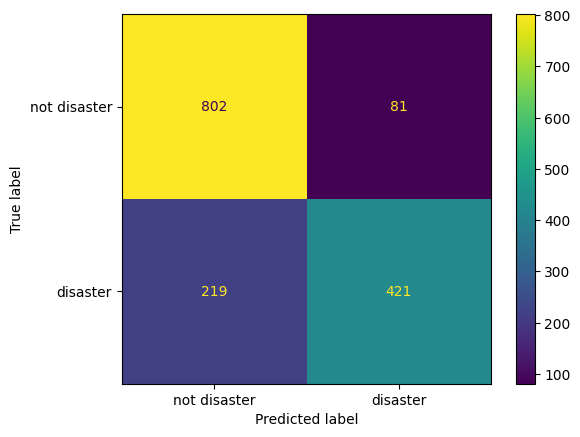

Best Lambdas: lambda_0=0.40, lambda_n=1.00, lambda_p=1.00
Accuracy: 0.80
Precision: 0.84
Recall: 0.66
F1 Score: 0.74


In [ ]:
# Refit model with best lambdas[lambda_0=0.40, lambda_n=1.00, lambda_p=1.00] ran for range(0, 1.0, 0.2)
lambda_0, lambda_n, lambda_p = best_lambdas
sentiment_weights = np.zeros_like(d1_augment_train_gen['target'], dtype=np.float32)
sentiment_weights[d1_augment_train_gen['sentiment'] == 0] = lambda_0
sentiment_weights[d1_augment_train_gen['sentiment'] == 1] = lambda_n
sentiment_weights[d1_augment_train_gen['sentiment'] == 2] = lambda_p
final_rf_model = RandomForestClassifier()
final_rf_model.fit(X_d1_train_augment, d1_augment_train_labels, sample_weight=sentiment_weights)

# Make predictions on validation set and compute performance metrics
rf_model_pred_best = final_rf_model.predict(X_d1_val_augment)
accuracy = accuracy_score(d1_augment_val_labels, rf_model_pred_best)
precision = precision_score(d1_augment_val_labels, rf_model_pred_best)
recall = recall_score(d1_augment_val_labels, rf_model_pred_best)
f1 = f1_score(d1_augment_val_labels, rf_model_pred_best)

# Print performance metrics
disp_best = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(d1_augment_val_labels , rf_model_pred_best), display_labels=['not disaster', 'disaster'])
disp_best.plot()
plt.show()

print(f"Best Lambdas: lambda_0={best_lambdas[0]:.2f}, lambda_n={best_lambdas[1]:.2f}, lambda_p={best_lambdas[2]:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


## Task 4.3: Is the optimal value result in lambda_0 = lambda_n = lambda_p? If not what is the ordering of the lambdas, and what can we infer from this ordering?
**Explanation:** 
1. To get the model performance, we tried different strategies (mentioned above). We ran Random Forest model with "Fixed unequal sample weights", "Fixed equal sample weights" and then "labmda value tunning in a range of 0 to 1, with a gap of 0.2. We do get same metrics values (Accuracy, Precision, Recall and F1 Score) [Optimal value] when all three lambdas have same value **[lambda_0 = lambda_n = lambda_p = 1]** and different values as well from lambda value tunning **[lambda_0=0.40, lambda_n=1.00, lambda_p=1.00]**

2. Best Metrics values obtained from same lambda values (when It is equal to 1.0) and different lambda values: **Accuracy: 0.80, Precision: 0.84, Recall: 0.66, F1 Score: 0.74**

3. From above explanation, we can say that there is a possibility of getting optimal values for different lambdas. In summary, if you assign same weightage or different weightage as a sample to all three sentiment labels: positive, negative and neutral for the prediction of disaster, you might end up having same model performance.



# Task 4.4: Train the model with the best lambda obtained in task 4.3. Evaluate it on D1 test.

## Random Forest Evaluation on D1_test data

In [ ]:
d1_test = pd.read_csv("/content/drive/My Drive/5151 Project/d1_test.csv")
d1_test.head()

d1_test["target"] = 0

X_d1_test = vectorizer.transform(d1_test['text'])
predictions_d1_test = final_rf_model.predict(X_d1_test)

In [ ]:
d1_test.head()

,id,keyword,location,text,target
0,0,NaN,NaN,Just happened a terrible car crash,0
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",1
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",1
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,0
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,1


In [ ]:
d1_test['target'] = predictions_d1_test
d1_test_final = d1_test[['id','target']]
d1_test_final.to_csv("/content/drive/My Drive/5151 Project/Submission_d1_test_rf.csv", index = False)

## Leaderboard Screenshots

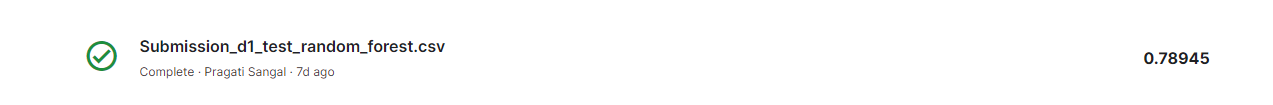

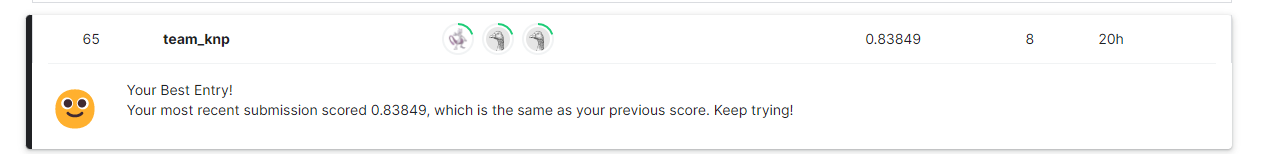